In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

In [2]:
df=pd.read_csv("heart_2020_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [3]:
#Veri seti içerisindeki tüm satır ve sütunlardaki null değerlerinin sayısını kontol ettik.
def num_missing(a):
  return sum(a.isnull())

print("NULL Değer Sayısı:")
print(df.apply(num_missing, axis=0))

NULL Değer Sayısı:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


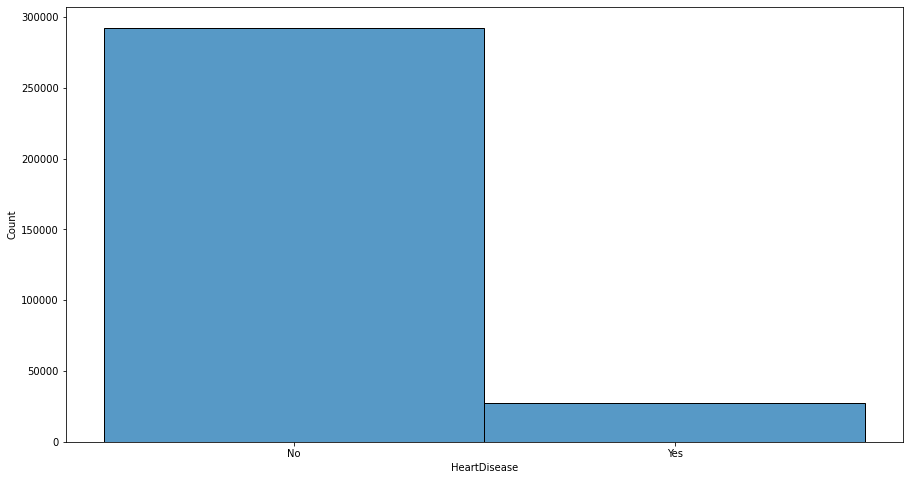

In [5]:
#Veri seti içerisindeki  ----Yes/No---   Oranları
fig,axes = plt.subplots(figsize=(15,8))
sns.histplot(ax=axes,data = df.HeartDisease)
plt.show()

In [6]:
No_Value = df.HeartDisease.value_counts()[0]
Yes_Value = df.HeartDisease.value_counts()[1]
print("The number of Yes Value has {}%".format(((Yes_Value/len(df))*100).round(2)))

The number of Yes Value has 8.56%


In [10]:
features = df.columns

In [8]:
# Take out all features is binary data (Yes, No) and (Male, Female)
binary_feature = []

for feature in df.columns:
    if np.isin(df[feature].unique(),["Yes","No"]).all() or np.isin(df[feature].unique(),["Male","Female"]).all():
        binary_feature.append(feature)

In [11]:
# Take out all features is continuous data
continuos_feature = ["BMI"]

In [12]:
# Take out all features is discrete data
discrete_feature = features[~features.isin(binary_feature+continuos_feature)]

In [13]:
df[binary_feature].head(5)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,Yes,Yes,No,Yes
1,No,No,No,Yes,No,Female,Yes,No,No,No
2,No,Yes,No,No,No,Male,Yes,Yes,No,No
3,No,No,No,No,No,Female,No,No,No,Yes
4,No,No,No,No,Yes,Female,Yes,No,No,No


In [14]:
# Create the function to visualize to pie chart
def Draw_pie_chart(name_feature):

    fig,axes = plt.subplots(1,2,figsize=(15,8))
    labels = df[name_feature].unique()
    textprops = {"fontsize":15}

    axes[0].pie(df[df.HeartDisease=="No"][name_feature].value_counts(), labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[0].set_title('No Heart Disease',fontsize=15)
    axes[1].pie(df[df.HeartDisease=="Yes"][name_feature].value_counts(), labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[1].set_title('Yes Heart Disease',fontsize=15)

    plt.legend(title = name_feature, fontsize=15, title_fontsize=15)
    plt.show()

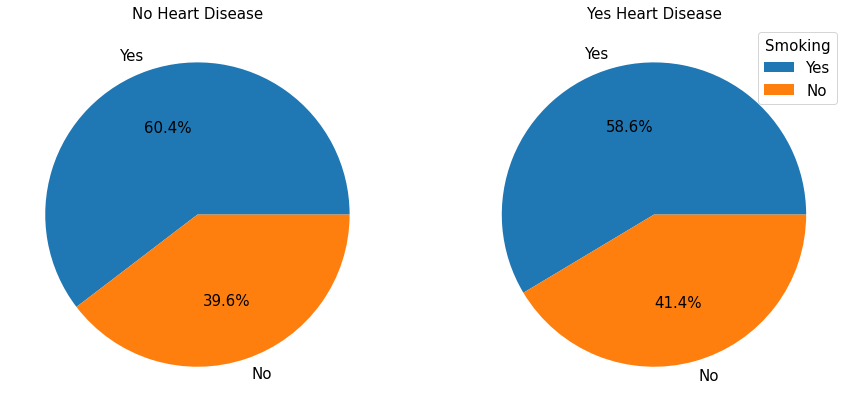

In [15]:
Draw_pie_chart("Smoking")

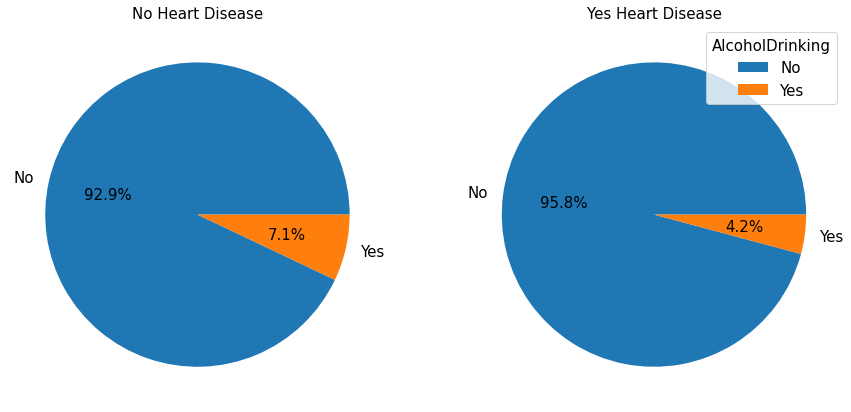

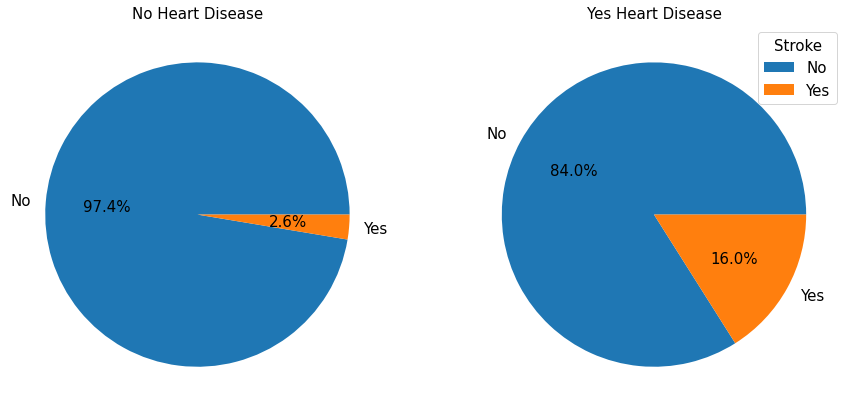

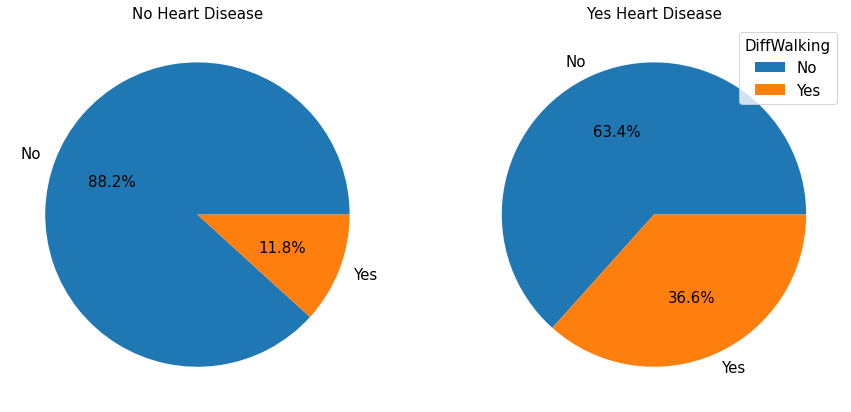

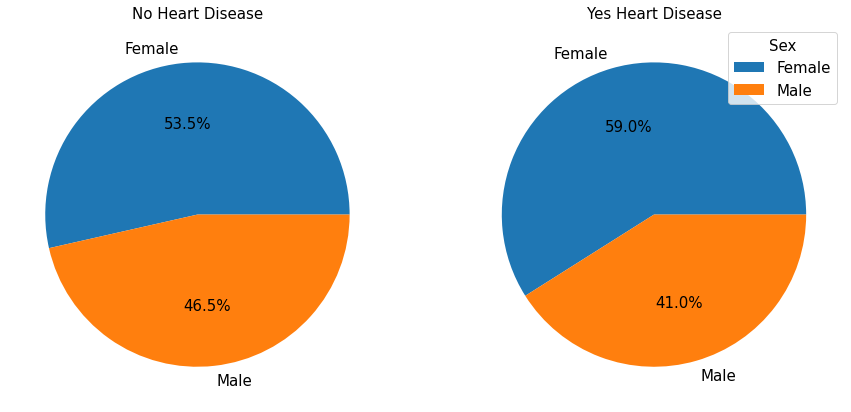

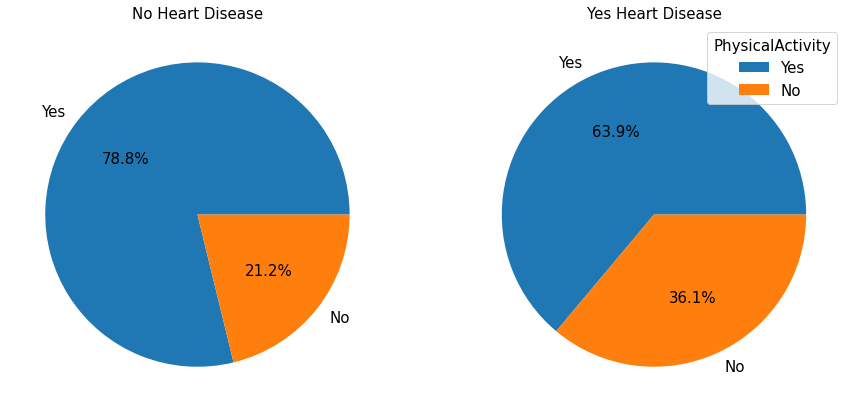

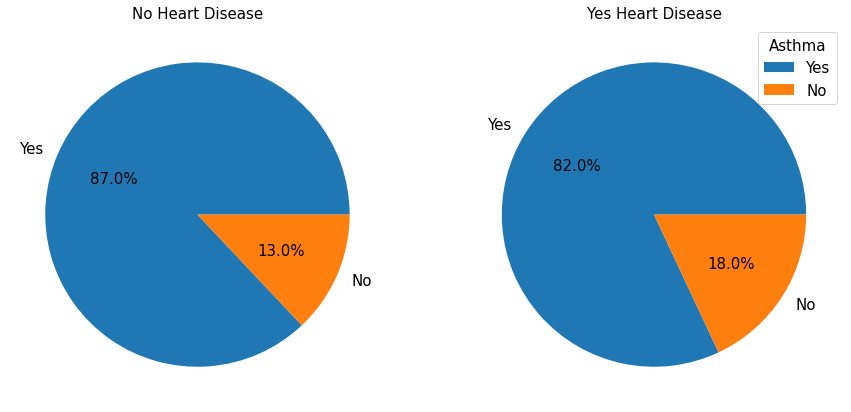

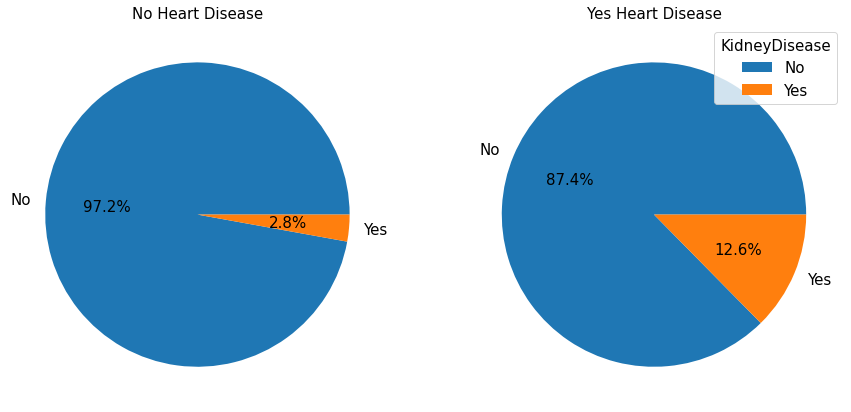

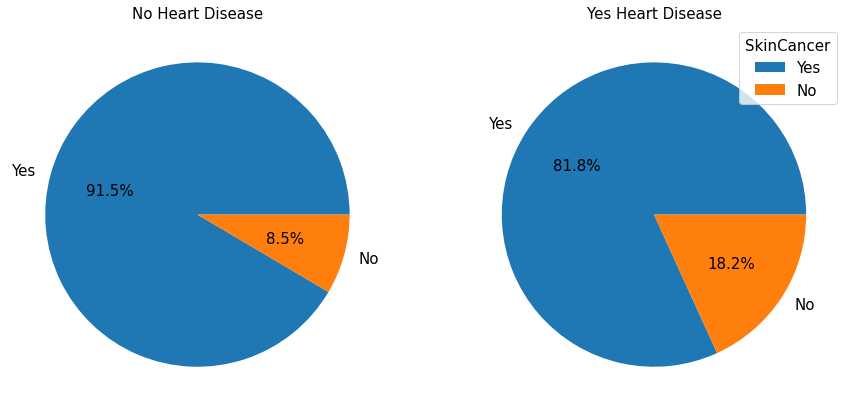

In [16]:

for feature in binary_feature[2:]:
    Draw_pie_chart(feature)

In [17]:
df[discrete_feature].head(5)

,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime
0,3.0,30.0,55-59,White,Yes,Very good,5.0
1,0.0,0.0,80 or older,White,No,Very good,7.0
2,20.0,30.0,65-69,White,Yes,Fair,8.0
3,0.0,0.0,75-79,White,No,Good,6.0
4,28.0,0.0,40-44,White,No,Very good,8.0


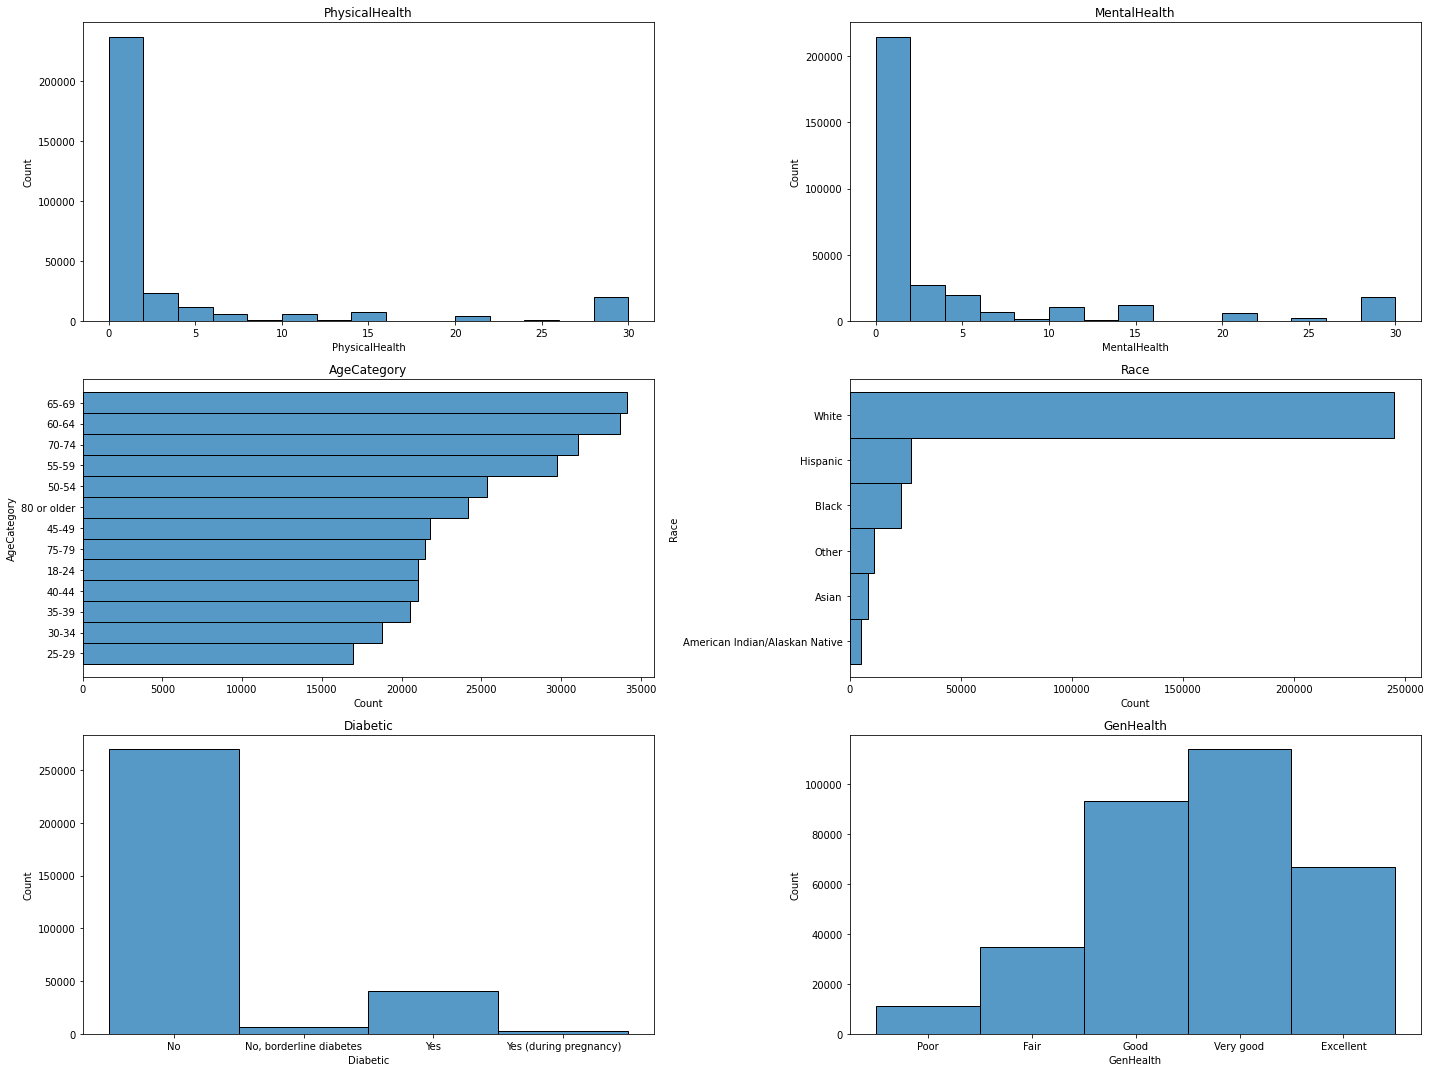

In [18]:
position_index = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
fig,axes = plt.subplots(3,2,figsize=(20,15))
for position, feature in zip(position_index, discrete_feature):
    if len(df[feature].unique()) > 15:
        sns.histplot(ax=axes[position],bins = 15, data=df[feature].sort_values())
    else:
        if feature in ["AgeCategory", "Race"]:
            i, r = pd.factorize(df[feature])
            a = np.argsort(np.bincount(i)[i], kind='mergesort')[::-1]
            sns.histplot(ax=axes[position],y=df.iloc[a][feature])
        elif feature == "GenHealth":
            sns.histplot(ax=axes[position],data=pd.Categorical(df.GenHealth, categories=["Poor","Fair","Good","Very good","Excellent"], ordered=True))
            axes[position].set(xlabel=feature)
        else:
            sns.histplot(ax=axes[position],data=df[feature].sort_values())
    axes[position].set_title(feature)
        
fig.tight_layout()
plt.show()

In [20]:
#Dataframe columnlarındaki unique değerler saptandı-- İkili değişken olanlar üzerinde maniplasyon yapılacak.
for i in range(df.shape[1]):
    print("Unique values in column {} are {}".format(i,df.iloc[:,i].unique()))

Unique values in column 0 are ['No' 'Yes']
Unique values in column 1 are [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Unique values in column 2 are ['Yes' 'No']
Unique values in column 3 are ['No' 'Yes']
Unique values in column 4 are ['No' 'Yes']
Unique values in column 5 are [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
Unique values in column 6 are [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
Unique values in column 7 are ['No' 'Yes']
Unique values in column 8 are ['Female' 'Male']
Unique values in column 9 are ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Unique values in column 10 are ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Unique values in column 11 are ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Uni

In [21]:
df.iloc[:,8].replace("Female",1,inplace=True)
df.iloc[:,8].replace("Male",0,inplace=True)
df.iloc[:,9].replace("18-24",1,inplace=True)
df.iloc[:,9].replace("25-29",2,inplace=True)
df.iloc[:,9].replace("30-34",3,inplace=True)
df.iloc[:,9].replace("35-39",4,inplace=True)
df.iloc[:,9].replace("40-44",5,inplace=True)
df.iloc[:,9].replace("45-49",6,inplace=True)
df.iloc[:,9].replace("50-54",7,inplace=True)
df.iloc[:,9].replace("55-59",8,inplace=True)
df.iloc[:,9].replace("60-64",9,inplace=True)
df.iloc[:,9].replace("65-69",10,inplace=True)
df.iloc[:,9].replace("70-74",11,inplace=True)
df.iloc[:,9].replace("75-79",12,inplace=True)
df.iloc[:,9].replace("80 or older",13,inplace=True)
df.iloc[:,10].replace("White",1,inplace=True)
df.iloc[:,10].replace("Black",2,inplace=True)
df.iloc[:,10].replace("Asian",3,inplace=True)
df.iloc[:,10].replace("American Indian/Alaskan Native",4,inplace=True)
df.iloc[:,10].replace("Other",5,inplace=True)
df.iloc[:,10].replace("Hispanic",6,inplace=True)
df.iloc[:,11].replace("Yes",4,inplace=True)
df.iloc[:,11].replace("Yes (during pregnancy)",3,inplace=True)
df.iloc[:,11].replace("No, borderline diabetes",2,inplace=True)
df.iloc[:,11].replace("No",1,inplace=True)
df.iloc[:,13].replace("Excellent",4,inplace=True)
df.iloc[:,13].replace("Very good",3,inplace=True)
df.iloc[:,13].replace("Good",2,inplace=True)
df.iloc[:,13].replace("Fair",1,inplace=True)
df.iloc[:,13].replace("Poor",0,inplace=True)
df.replace("Yes",1,inplace=True)
df.replace("No",0,inplace=True)

In [22]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,8,1,4,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,13,1,1,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,10,1,4,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,12,1,1,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,5,1,1,1,3,8.0,0,0,0


In [23]:
df.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
AgeCategory,7.514536,3.564759,1.000000,5.000000,8.000000,10.000000,13.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


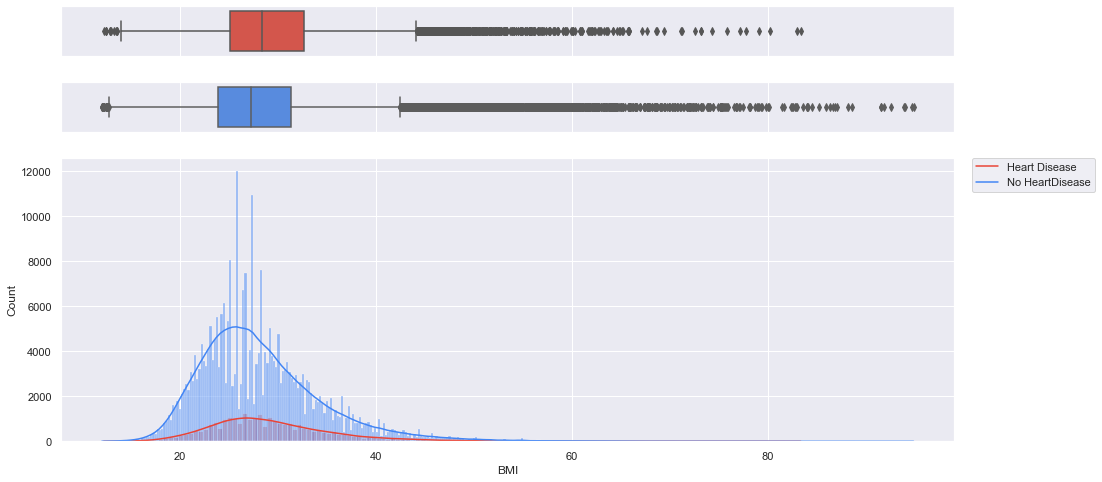

In [26]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=df[df['HeartDisease']==1]["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(df[df['HeartDisease']==1], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=df[df['HeartDisease']==0]["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(df[df['HeartDisease']==0], x="BMI", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

In [27]:
y = df.HeartDisease.values
x_d = df.drop(["HeartDisease"], axis=1)
x=df.iloc[:,1:]

# Test-Train Veri seti Ayırma

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)

## Logistic Regression Model 

In [32]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression(max_iter=500)
lrmodel.fit(X_train,y_train)
lrmodel.score(X_test,y_test)

0.9162744883440954

[[58011   473]
 [ 4882   593]]


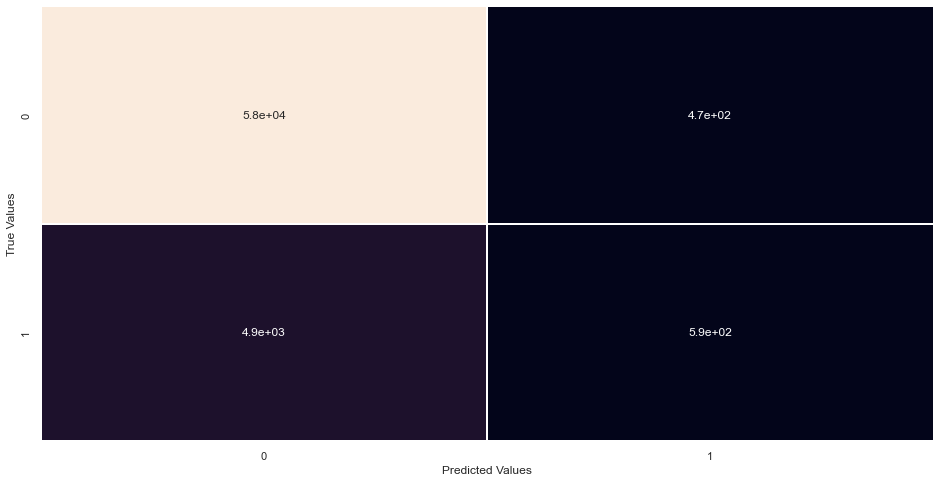

In [33]:
from sklearn.metrics import confusion_matrix
predictedlr=lrmodel.predict(X_test)
matrixlr=confusion_matrix(y_test,predictedlr)
sns.heatmap(matrixlr,annot=True,lw=2,cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
print(matrixlr)

In [34]:
from sklearn.metrics import classification_report
print('LRMODEL METRICS')
reportlr=classification_report(y_test,predictedlr)
print(reportlr)

LRMODEL METRICS
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58484
           1       0.56      0.11      0.18      5475

    accuracy                           0.92     63959
   macro avg       0.74      0.55      0.57     63959
weighted avg       0.89      0.92      0.89     63959



In [9]:
#predictedlr=lrmodel.predict(X_test)

## XGBOOST MODEL

In [35]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(n_estimators=100)
xgboost_model.fit(X_train, y_train)
xgboost_model.score(X_test,y_test)


c:\Users\Berk\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\Berk\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Berk\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropr

[20:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.91553964258353

In [11]:
#predictedXGB=xgboost_model.predict(X_test)

C:\Users\Berk\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[[58016   468]
 [ 4934   541]]


c:\Users\Berk\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


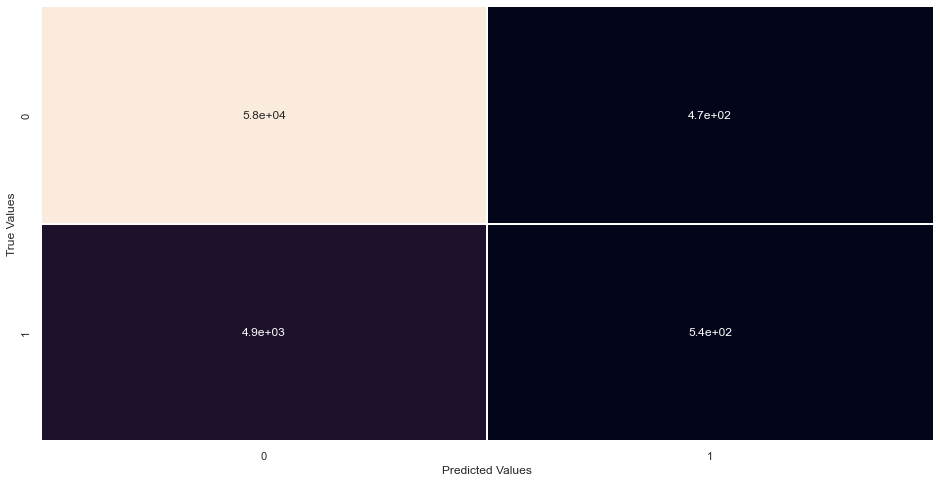

In [36]:
predictedXGB=xgboost_model.predict(X_test)
matrixXGB=confusion_matrix(y_test,predictedXGB)
sns.heatmap(matrixXGB,annot=True,lw=2,cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
print(matrixXGB)

In [37]:
from sklearn.metrics import classification_report
print('XGBMODEL METRICS')
reportXGB=classification_report(y_test,predictedXGB)
print(reportXGB)

XGBMODEL METRICS
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58484
           1       0.54      0.10      0.17      5475

    accuracy                           0.92     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.92      0.89     63959



## LIGHTGBM MODEL

In [38]:
import lightgbm as lgb
lgbmodel=lgb.LGBMClassifier()
lgbmodel.fit(X_train,y_train)
lgbmodel.score(X_test,y_test)

0.916243218311731

[[58144   340]
 [ 5017   458]]


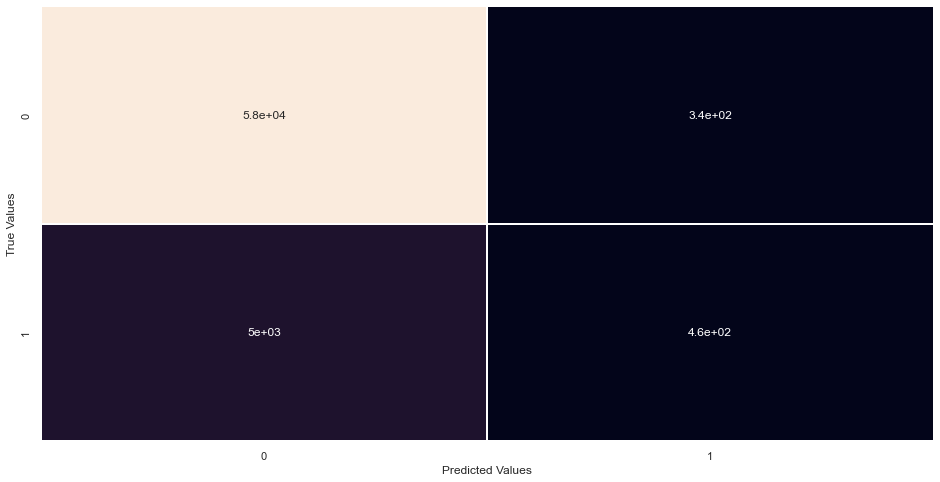

In [39]:
predictedLGB=lgbmodel.predict(X_test)
matrixLGB=confusion_matrix(y_test,predictedLGB)
sns.heatmap(matrixLGB,annot=True,lw=2,cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
print(matrixLGB)

In [40]:
from sklearn.metrics import classification_report
print('LGBMODEL METRICS')
reportLGB=classification_report(y_test,predictedLGB)
print(reportLGB)

LGBMODEL METRICS
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58484
           1       0.57      0.08      0.15      5475

    accuracy                           0.92     63959
   macro avg       0.75      0.54      0.55     63959
weighted avg       0.89      0.92      0.89     63959



In [41]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model=RandomForestClassifier(n_estimators=100)
randomforest_model.fit(X_train,y_train)
randomforest_model.score(X_test,y_test)

0.9071592739098485

### YANLILIK AZALTMA > F1-SCORE YÜKSELTME

#### RESSAMPLER TEKNİĞİ

In [42]:
undersample = RandomUnderSampler(sampling_strategy="majority")
x_under, y_under = undersample.fit_resample(x,y)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.2, random_state=20)

#### Logistic Regression Model with  RESAMPLER 

In [44]:
log_model_us = LogisticRegression(max_iter=500)
log_model_us.fit(x_train, y_train)
log_model_us.score(x_test,y_test)

0.7655707762557078

In [45]:
predictedlog_model_us=log_model_us.predict(x_test)

In [46]:
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib
from sklearn.metrics import confusion_matrix

[[4126 1379]
 [1188 4257]]


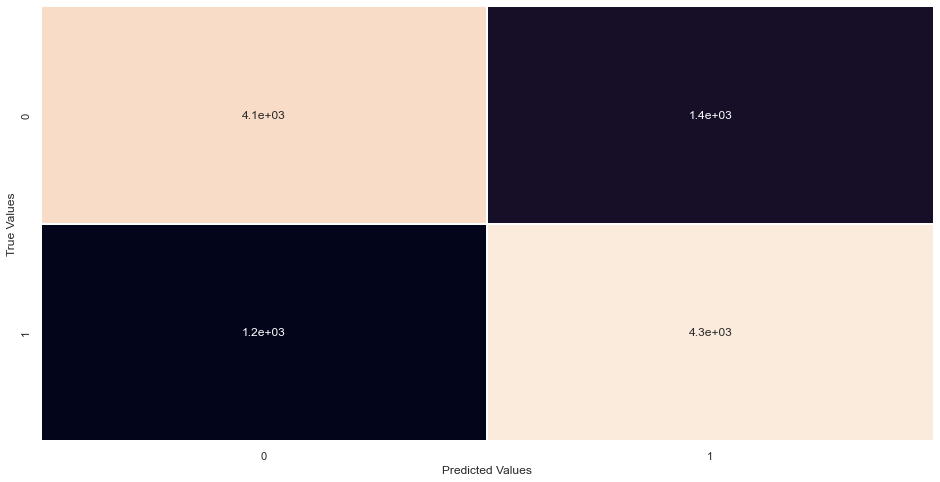

In [47]:
matrixpredictedlog_model=confusion_matrix(y_test,predictedlog_model_us)
sns.heatmap(matrixpredictedlog_model,annot=True,lw=2,cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
print(matrixpredictedlog_model)

In [48]:
reportlog_model_us=classification_report(y_test,predictedlog_model_us)
print(reportlog_model_us)

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      5505
           1       0.76      0.78      0.77      5445

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



In [49]:
def model_x(model, x_test, y_test):
    assert len(x_test) == len(y_test), "X_test and y_test are not equal in size."
    
    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)[::, 1]
    print(classification_report(y_pred, y_test))
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'AUC: {round(auc, 2)}')
    plt.legend()
    plt.show()

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      5314
           1       0.78      0.76      0.77      5636

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950



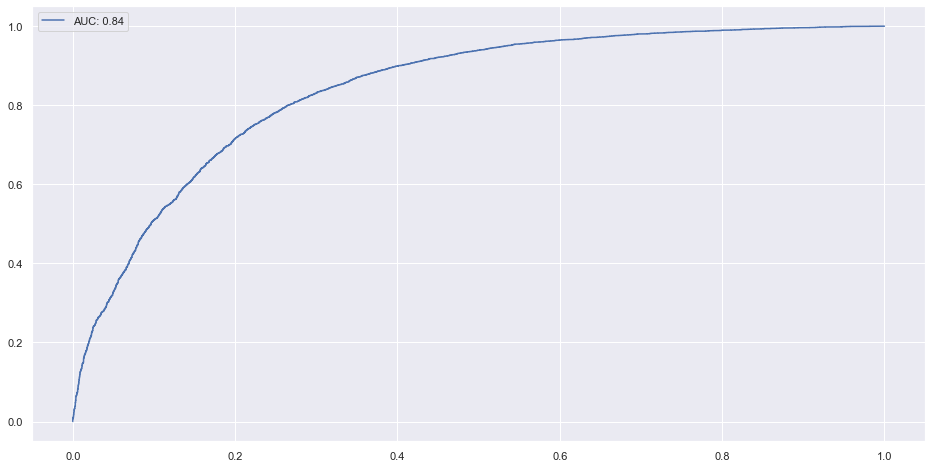

In [50]:
model_x(log_model_us, x_test, y_test)

In [24]:
#columns=["BMI", "Smoking", "AlcoholDrinking", "Stroke" ,"PhysicalHealth" ,"MentalHealth", "DiffWalking" ,"Sex", "AgeCategory" ,"Race","Diabetic","PhysicalActivity","GenHealth","SleepTime","Asthma","KidneyDisease","SkinCancer"]
#datax= pd.DataFrame(index = ["X"],columns=columns) 

In [25]:
#datax

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# datax.loc[["X"], "BMI"]=20
# datax.loc[["X"], "Smoking"]=0
# datax.loc[["X"], "AlcoholDrinking"]=1
# datax.loc[["X"], "Stroke"]=0
# datax.loc[["X"], "PhysicalHealth"]=30.0
# datax.loc[["X"], "MentalHealth"]=30.0
# datax.loc[["X"], "DiffWalking"]=0
# datax.loc[["X"], "Sex"]=1
# datax.loc[["X"], "AgeCategory"]=3
# datax.loc[["X"], "Race"]=1
# datax.loc[["X"], "Diabetic"]=1
# datax.loc[["X"], "PhysicalActivity"]=1
# datax.loc[["X"], "GenHealth"]=0
# datax.loc[["X"], "SleepTime"]=9.0
# datax.loc[["X"], "Asthma"]=0
# datax.loc[["X"], "KidneyDisease"]=0
# datax.loc[["X"], "SkinCancer"]=1


In [43]:
# result=log_model_us.predict_proba(datax)[0][1]
# result2=log_model_us.predict(datax)
# print(result)
# print(result2)

0.21086634443501967
[0]


In [66]:
# x_test[:1]

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
50998,22.31,0,0,0,1.0,0.0,0,1,1,1,1,1,1,7.0,0,0,0


In [117]:
#import pickle 
#pickle.dump(log_model_us,open("logisticreg_heart.pkl","wb"))